## Awaiz Hussain - 23100185

## Import Libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.optimize import curve_fit

## Reading Dataset

In [49]:
df = pd.read_csv('user_behavior_dataset.csv')
df.head(10)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
5,6,Google Pixel 5,Android,99,2.0,940,35,564,31,Male,2
6,7,Samsung Galaxy S21,Android,350,7.3,1802,66,1054,21,Female,4
7,8,OnePlus 9,Android,543,11.4,2956,82,1702,31,Male,5
8,9,Samsung Galaxy S21,Android,340,7.7,2138,75,1053,42,Female,4
9,10,iPhone 12,iOS,424,6.6,1957,75,1301,42,Male,4


## Info Dataset

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


## Describing Dataset

In [53]:
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


## Checking NaN values

In [55]:
# Checking column wise nan values
nan_counts = df.isna().sum()
print(nan_counts)

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64


## Dropping categorical data

In [57]:
# Drop categorical data for numerical processing
numeric_df = df.select_dtypes(include=["number"])

## Plotting

## Heatmap

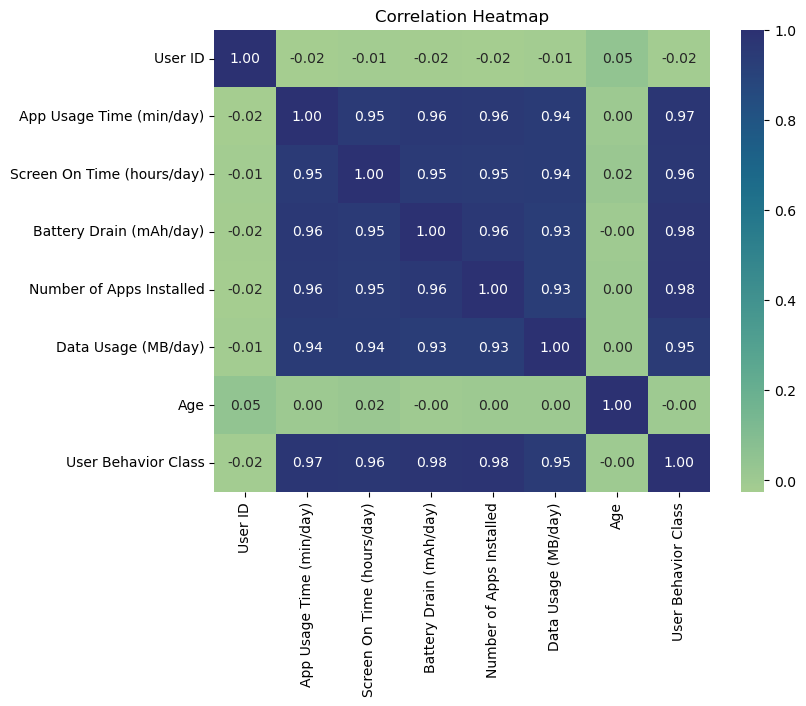

In [60]:
def plot_correlation_heatmap(df):
    """Plot a heatmap of the correlation matrix."""
    plt.figure(figsize=(8, 6))
    sns.heatmap(df.corr(), annot=True, cmap='crest', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

plot_correlation_heatmap(numeric_df)

## Histogram

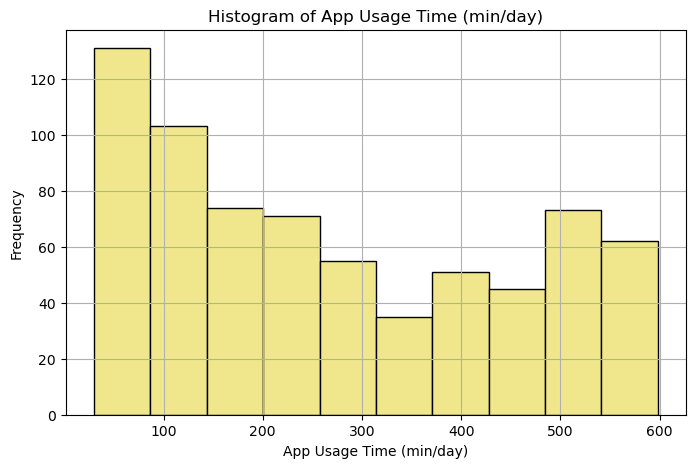

In [62]:
def plot_histogram(data, column):
    """Plot histogram of a single numeric column."""
    plt.figure(figsize=(8, 5))
    plt.hist(data[column], bins=10, color='khaki', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

plot_histogram(numeric_df, 'App Usage Time (min/day)')

## Scatter

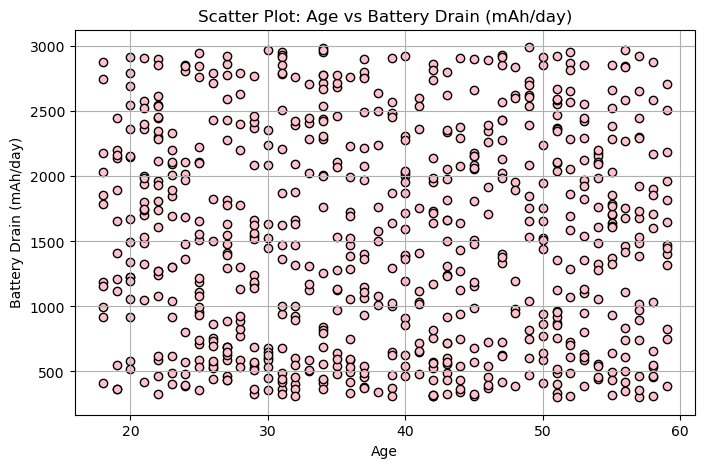

In [64]:
def scatter_plot(x, y, x_label, y_label):
    """Create a scatter plot for two numeric columns."""
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, c='pink', edgecolors='black')
    plt.title(f'Scatter Plot: {x_label} vs {y_label}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

scatter_plot(numeric_df['Age'], numeric_df['Battery Drain (mAh/day)'], 'Age', 'Battery Drain (mAh/day)')

C:\Users\hgurm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\hgurm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\hgurm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


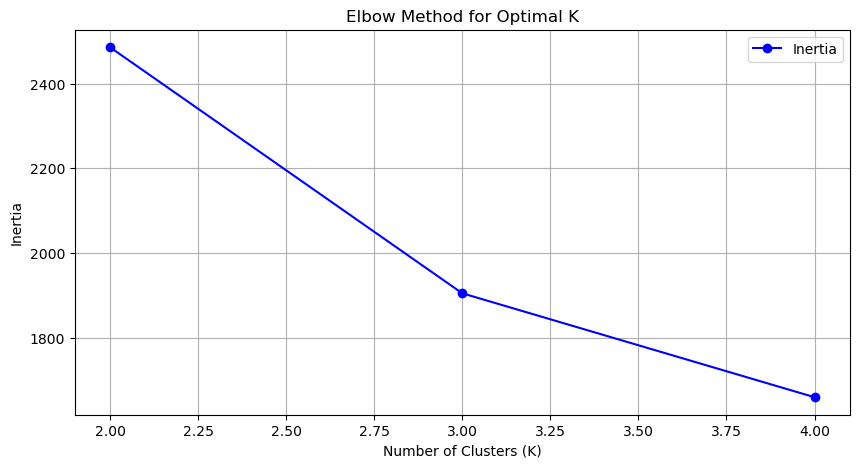

Silhouette Scores: [0.45667855391520057, 0.3507617991910084, 0.34282678177737136]


In [65]:
def elbow_and_kmeans(df, max_clusters=5):
    """Perform KMeans clustering and plot the elbow method to find optimal k."""
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    
    inertia = []
    silhouette = []
    
    for k in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(scaled_data)
        inertia.append(kmeans.inertia_)
        silhouette.append(silhouette_score(scaled_data, kmeans.labels_))
    
    # Plot elbow method
    plt.figure(figsize=(10, 5))
    plt.plot(range(2, max_clusters+1), inertia, 'bo-', label='Inertia')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    # Silhouette scores
    print("Silhouette Scores:", silhouette)

elbow_and_kmeans(numeric_df, max_clusters=4)

## Decide n clusters

On the basis of "Silhouette Scores: [0.45667855391520057, 0.3507617991910084, 0.34282678177737136]" for cluster 2,3,4 respectively we have decided the clusters that will be 2


C:\Users\hgurm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


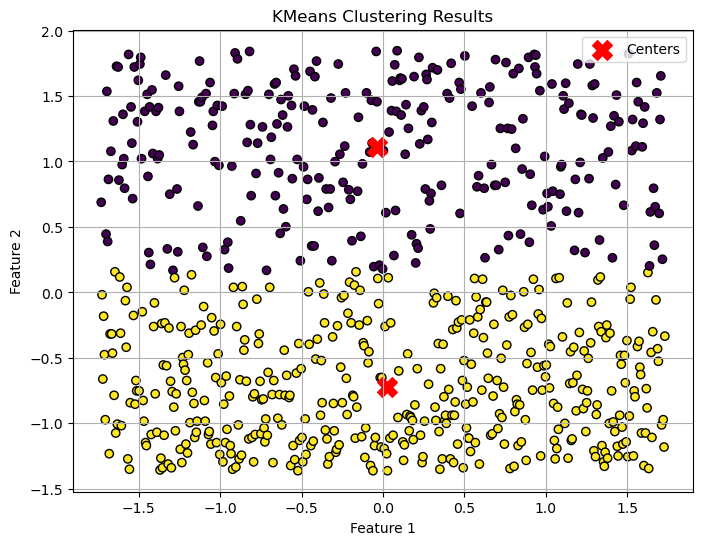

In [68]:
def kmeans_clustering(df, n_clusters):
    """Run KMeans clustering and plot the clusters."""
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(scaled_data)
    
    # Plot clustering results
    plt.figure(figsize=(8, 6))
    plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis', edgecolors='k')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centers')
    plt.title('KMeans Clustering Results')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()
    return clusters

clusters = kmeans_clustering(numeric_df, n_clusters=2)

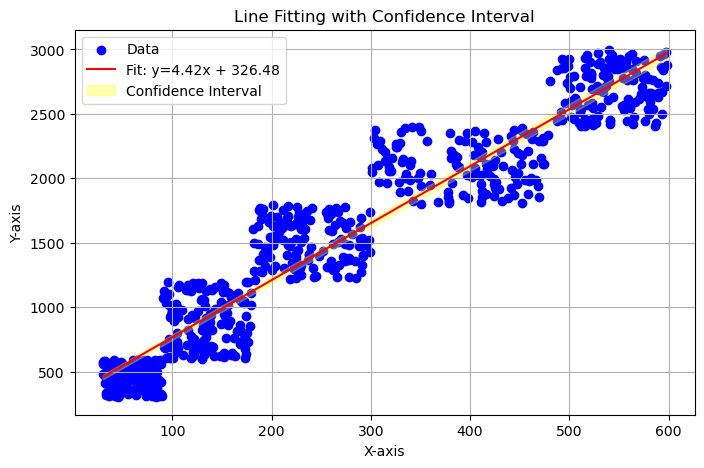

Slope: 4.42 ± 0.05, Intercept: 326.48 ± 16.55


In [88]:
def line_fit(x, y):
    """Perform line fitting using curve_fit."""
    def linear_func(x, a, b):
        return a * x + b

    params, covariance = curve_fit(linear_func, x, y)
    errors = np.sqrt(np.diag(covariance))
    
    # Extract slope and intercept with their errors
    slope, intercept = params
    slope_error, intercept_error = errors

    # Generate line fit
    x_fit = np.linspace(min(x), max(x), 100)
    y_fit = linear_func(x_fit, slope, intercept)

    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, label='Data', color='blue')
    plt.plot(x_fit, y_fit, color='red', label=f'Fit: y={slope:.2f}x + {intercept:.2f}')
    plt.fill_between(x_fit, 
                     linear_func(x_fit, slope - slope_error, intercept - intercept_error),
                     linear_func(x_fit, slope + slope_error, intercept + intercept_error),
                     color='yellow', alpha=0.3, label='Confidence Interval')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Line Fitting with Confidence Interval')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Slope: {slope:.2f} ± {slope_error:.2f}, Intercept: {intercept:.2f} ± {intercept_error:.2f}")

# Call the function
line_fit(numeric_df['App Usage Time (min/day)'], numeric_df['Battery Drain (mAh/day)'])

In [70]:
# Add cluster results to original DataFrame
df['Cluster'] = clusters
print(df)

     User ID        Device Model Operating System  App Usage Time (min/day)  \
0          1      Google Pixel 5          Android                       393   
1          2           OnePlus 9          Android                       268   
2          3        Xiaomi Mi 11          Android                       154   
3          4      Google Pixel 5          Android                       239   
4          5           iPhone 12              iOS                       187   
..       ...                 ...              ...                       ...   
695      696           iPhone 12              iOS                        92   
696      697        Xiaomi Mi 11          Android                       316   
697      698      Google Pixel 5          Android                        99   
698      699  Samsung Galaxy S21          Android                        62   
699      700           OnePlus 9          Android                       212   

     Screen On Time (hours/day)  Battery Drain (mAh

## Total each cluster count

In [72]:
cluster_counts = df['Cluster'].value_counts()
print(cluster_counts)

Cluster
1    425
0    275
Name: count, dtype: int64
